Engy-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **21Dec21**

# Homework 08 (21Dec21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (40 pts)](#a1) Fuel plate with thin reflector coating; criticality analysis.
 - [1.1)](#a11)(10 pts) Describe solution method.
 - [1.2)](#a12)(10 pts) Compute the largest 5 eigenvalues.
 - [1.3)](#a13)(10 pts) Show results for the fundamental mode.
 - [1.4)](#a14)(10 pts) Show results for the remaining modes.
* [Assignment 2 (55 pts)](#a2) Bare fuel plate criticality analysis with extrapolated boundary.
 - [2.1)](#a21)(15 pts) Describe solution method.
 - [2.2)](#a22)(15 pts) Compute the largest 5 eigenvalues.
 - [2.3)](#a23)(15 pts) Show results for the fundamental mode.
 - [2.4)](#a24)(10 pts) Show results for the remaining modes.
* [Assignment 3 (5 pts)](#a3) .
---

## <span style="color:blue">[Assignment 1 (40 pts)](#toa)</span><a id="a1"></a>

### [Boundary-Value Problem Statement](#toa)<a id="poisson"></a>

Solve the neutron flux intensity criticality problem. Find $u_p:[a,a+h]\subset\Reals\rightarrow\Reals$ and $u_r:[a+h,b]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\bigl(-D_p\, u_p'\bigr)'(x) + \bigl(\frac{1}{k}\nu\Sigma_{f,p} - \Sigma_{a,p}\bigr)\,u_p(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,a+h[, \\
  -\bigl(-D_r\, u_r'\bigr)'(x) - \Sigma_{a,r}\,u_r(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a+h,b[, \\
 u'_p(a) &= 0, \\
 u_p(a+h) &= u_r(a+h), \\
 -D_p\,u'_p(a+h) &= -D_r\,u'_r(a+h), \\
 u_r(b) &= 0.
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, neutron multiplication factor, $k$, and macroscopic absorption cross section, $\Sigma_a$.

In [1]:
'''Domain'''

def show_domain(screenshot=False):
    import pyvista as pv
    pv.set_plot_theme('paraview')
    a = 1
    b = 2
    plate = pv.Box((-a,a,-3*a,3*a,-5*a,5*a))
    reflector1 = pv.Box((a,a+b,-3*a,3*a,-5*a,5*a))
    reflector2 = pv.Box((-a,-a-b,-3*a,3*a,-5*a,5*a))
    #plo = pv.Plotter(notebook=True, shape=(1,2))
    plo = pv.Plotter(shape=(1,1)) 
    plo.subplot(0,0)
    plo.add_mesh(plate, color='red', opacity=1.0,)
    plo.add_mesh(reflector1, color='tan', opacity=0.5)
    plo.add_mesh(reflector2, color='tan', opacity=0.5)
    plo.add_axes(xlabel='X', ylabel='Y', zlabel='Z')
    plo.camera.zoom(1.1)
    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')

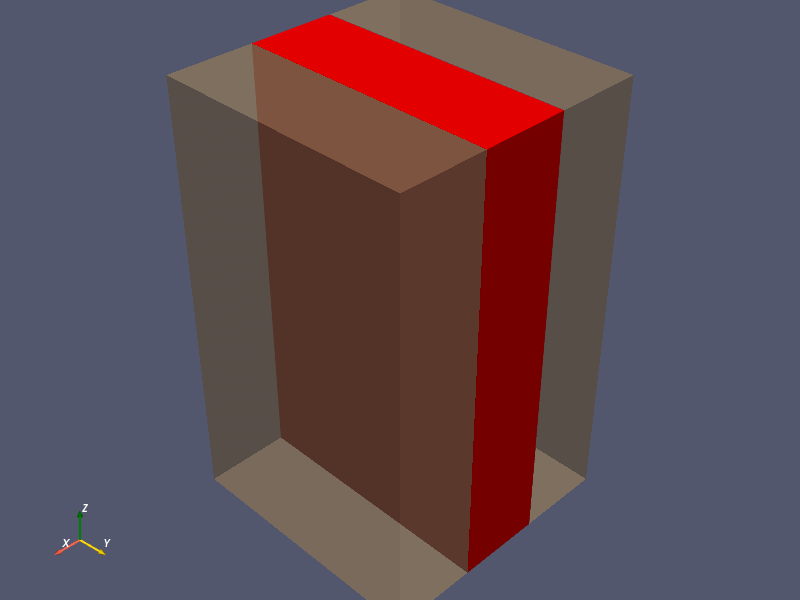

In [53]:
show_domain()

### <span style="color:blue">[1.1)](#toa)(10 pts) Describe a Rayleigh-Ritz or Galerkin Finite element method formulation for the above eigenvalue problem, and show the algebraic problem to be solved.
</span><a id="a11"></a>

### <span style="color:blue">[1.2)](#toa)(10 pts) Given the data below, compute the largest 5 eigenvalues accurately.
</span><a id="a12"></a>

### [Data](#toa)<a id="data"></a>

Solve problem with parameter values:

> + a = 0 cm
> + h = 10 cm
> + b = 10 cm
> + $D_p$ = 1.44 cm
> + $\Sigma_{a,p}$ = 0.1 cm^-1
> + $\Sigma_{f,p}$ = 0.1 cm^-1
> + $\nu$ = 2.4355
> + $D_r$ = 1.85 cm
> + $\Sigma_{a,r}$ =  0.01226 cm^-1

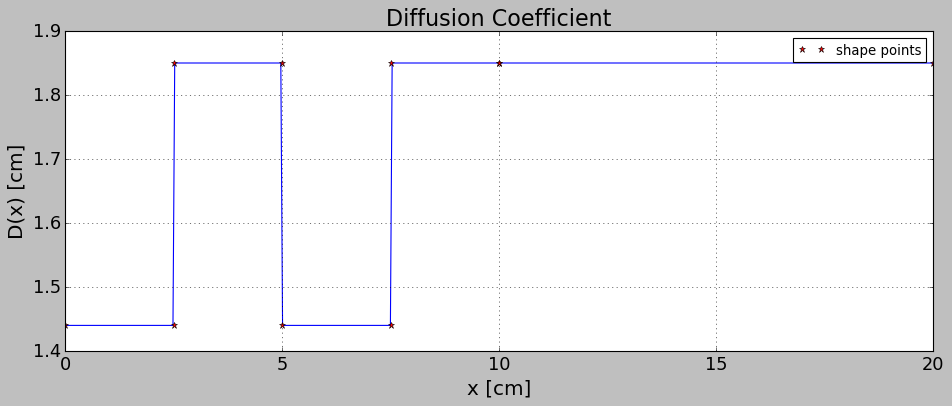

In [6]:
'''Diffusion coefficient function'''

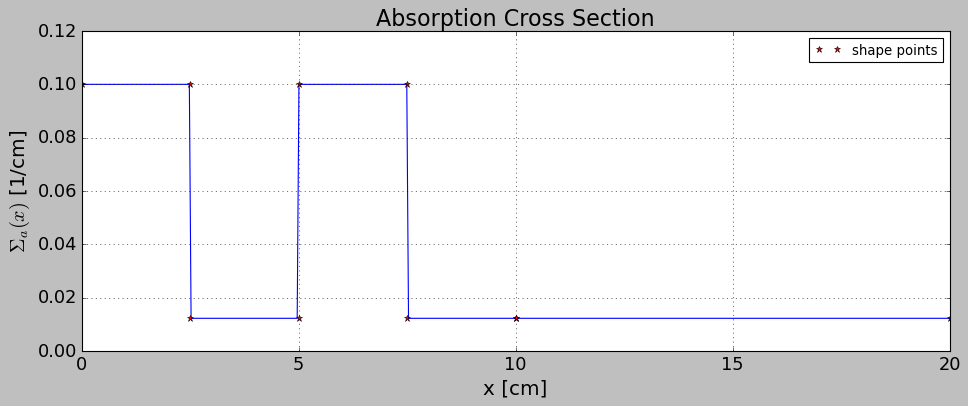

In [7]:
'''Absoption cross section function'''

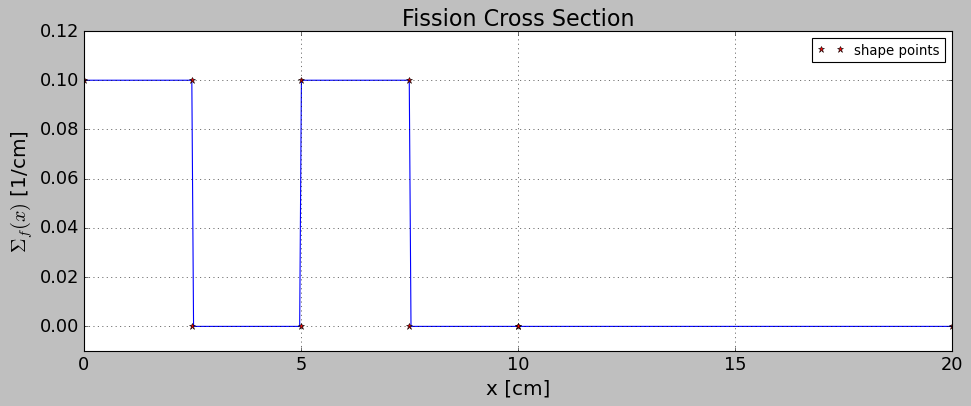

In [8]:
'''Fission cross section function'''

In [18]:
'''Eigenvalues'''

k =  [1.66412 0.56108 0.19918 0.11025 0.07894]


### <span style="color:blue">[1.3)](#toa)(10 pts) Show results for the fundamental mode as below.
</span><a id="a13"></a>

k = 1.66412e+00

   x [cm]        u [a.u]      -D u'_x [a.u]
 1)  0.00        1.00000       0.00001
 2)  1.05        0.98222       0.34761
 3)  2.11        0.92951       0.68280
 4)  3.16        0.86375       0.70240
 5)  4.21        0.81411       0.54956
 6)  5.26        0.77256       0.50844
 7)  6.32        0.70728       0.76786
 8)  7.37        0.61684       1.00000
 9)  8.42        0.53581       0.93593
10)  9.47        0.46521       0.84471
11)  10.53        0.40135       0.76567
12)  11.58        0.34331       0.69795
13)  12.63        0.29025       0.64031
14)  13.68        0.24139       0.59193
15)  14.74        0.19604       0.55210
16)  15.79        0.15352       0.52025
17)  16.84        0.11324       0.49593
18)  17.89        0.07459       0.47878
19)  18.95        0.03703       0.46856
20)  20.00        0.00000       0.46512


In [28]:
'''Total flux balance'''

Total flux balance relative error [%] = -0.03 


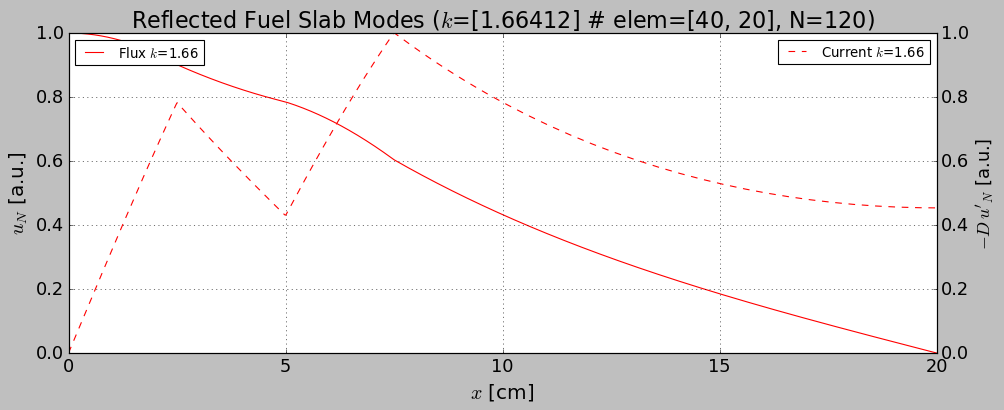

### <span style="color:blue">[1.4)](#toa)(10 pts) Show the following results for the remaining modes.
</span><a id="a14"></a>

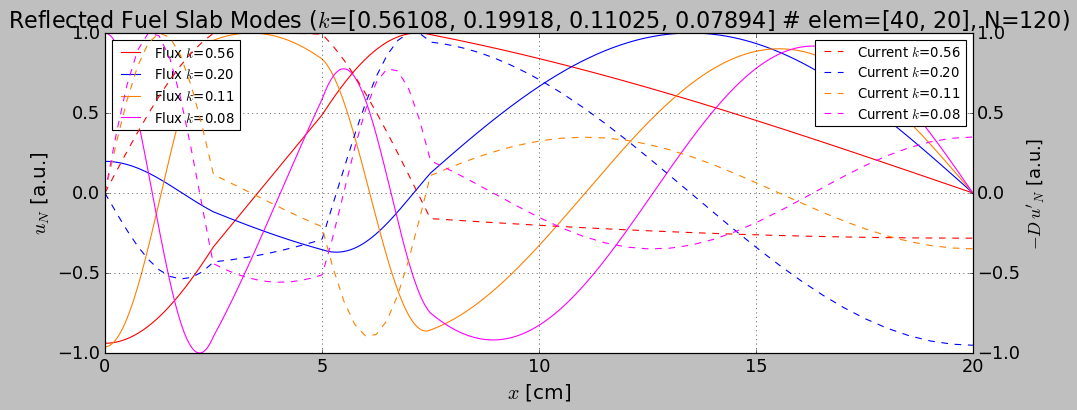

## <span style="color:blue">[Assignment 2 (55 pts)](#toa)</span><a id="a2"></a>

### [Boundary-Value Problem Statement](#toa)<a id="poisson"></a>

Solve the neutron flux intensity criticality problem. Find $u_p:[a,a+h]\subset\Reals\rightarrow\Reals$ and $u_r:[a+h,b]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\bigl(-D_p\, u_p'\bigr)'(x) + \bigl(\frac{1}{k}\nu\Sigma_{f,p} - \Sigma_{a,p}\bigr)\,u_p(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,a+h[, \\
  -\bigl(-D_r\, u_r'\bigr)'(x) - \Sigma_{a,r}\,u_r(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a+h,b[, \\
 u'_p(a) &= 0, \\
 u_p(a+h) &= u_r(a+h), \\
 -D_p\,u'_p(a+h) &= -D_r\,u'_r(a+h), \\
  -D\,u'(b) &= \frac{D}{\delta}\,u(b).
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, neutron multiplication factor, $k$, macroscopic absorption cross section, $\Sigma_a$, and domain extrapolation length $\delta$ in the $x$ direction at the right end.

### <span style="color:blue">[2.1)](#toa)(15 pts) Describe a Rayleigh-Ritz or Galerkin Finite element method formulation for the above eigenvalue problem, and show the algebraic problem to be solved.
</span><a id="a21"></a>

### <span style="color:blue">[2.2)](#toa)(15 pts) Given the data below, compute the largest 5 eigenvalues accurately.
</span><a id="a22"></a>

### [Data](#toa)<a id="data"></a>

Solve problem with the same parameters as before and:

> + b = 10 cm + 10 cm
> + $\delta$ = 5 cm

In [42]:
'''Eigenvalues'''

k =  [1.68467 0.58167 0.26737 0.12118 0.08785]


### <span style="color:blue">[2.3)](#toa)(15 pts) Show results for the fundamental mode as below.
</span><a id="a23"></a>

k = 1.68467e+00

   x [cm]        u [a.u]      -D u'_x [a.u]
 1)  0.00        1.00000       0.00001
 2)  1.05        0.98290       0.35065
 3)  2.11        0.93219       0.68926
 4)  3.16        0.86902       0.70390
 5)  4.21        0.82197       0.54086
 6)  5.26        0.78345       0.49356
 7)  6.32        0.72234       0.75976
 8)  7.37        0.63653       1.00000
 9)  8.42        0.55949       0.92801
10)  9.47        0.49318       0.82649
11)  10.53        0.43407       0.73699
12)  11.58        0.38132       0.65849
13)  12.63        0.33414       0.58958
14)  13.68        0.29185       0.52926
15)  14.74        0.25383       0.47666
16)  15.79        0.21953       0.43102
17)  16.84        0.18843       0.39167
18)  17.89        0.16010       0.35804
19)  18.95        0.13410       0.32964
20)  20.00        0.11007       0.30606


In [48]:
'''Total flux balance'''

Total flux balance relative error [%] = -0.03 


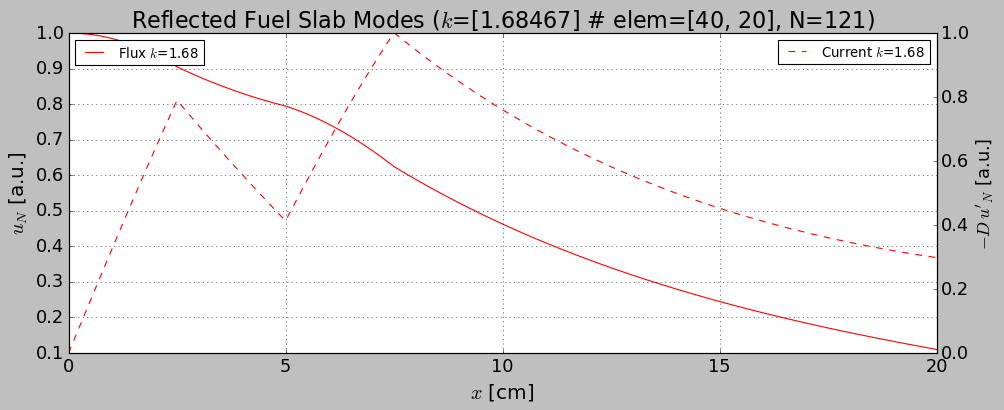

### <span style="color:blue">[2.4)](#toa)(10 pts) Show the following results for the remaining modes.
</span><a id="a24"></a>

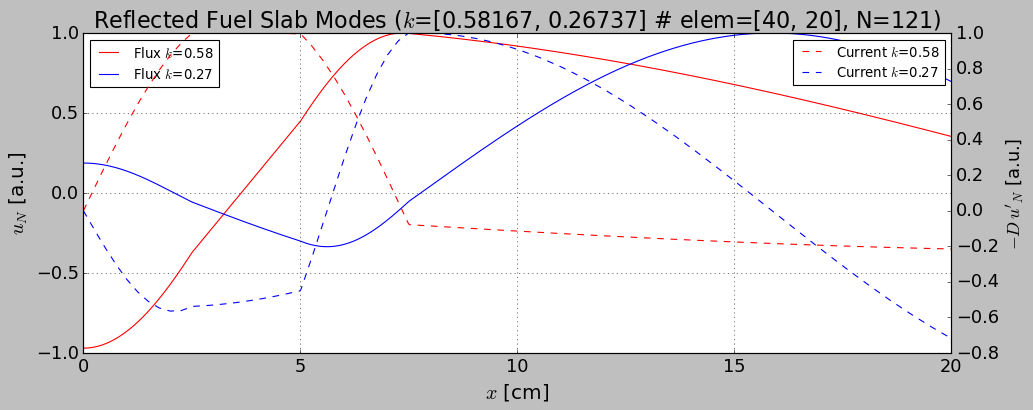

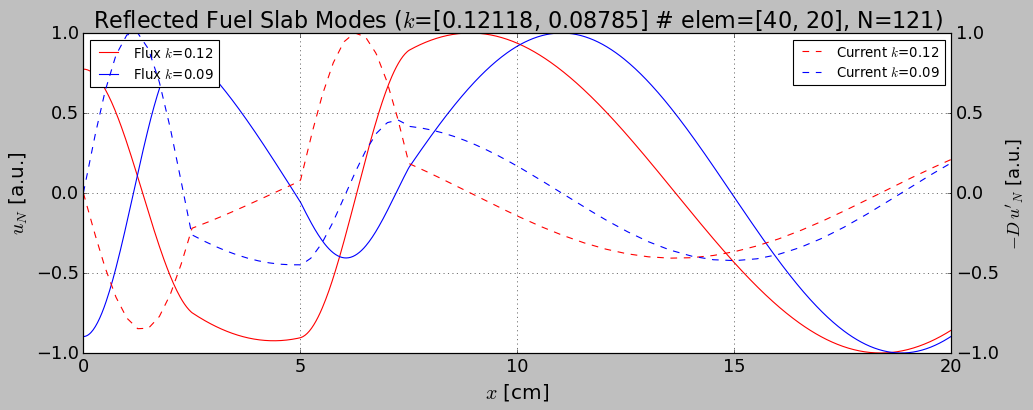

## <span style="color:blue">[Assignment 3 (5 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

<span style="color:blue">**Elaborate here:**</span>